# RidhoChaerullah_202231122

## Q-Learning

In [162]:
import numpy as np
import pylab as plb

In [163]:
# titik peghubung antar node,
# cara membaca(0,1) = saling berhubungan
points_list = [(0,1), (1,6), (5,6), (5,4), (1,2), (2,3), (2,7)]

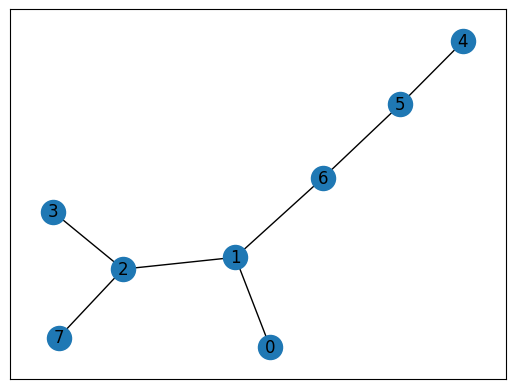

In [164]:
goal = 7 # Node 7 adalah "goal" atau tujuan akhir.

import networkx as nx # library untuk menggambar graph

G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plb.show()

In [165]:
MATRIX_SIZE = 8

R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
print(R)
# Kemudian, nilai R diperbarui berdasarkan points_list. Jika ada edge menuju node tujuan (goal), nilai reward adalah 100. Jika tidak, nilai reward adalah 0

R *= -1

print(R)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [166]:
for point in points_list:

    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100
R

#Hasilnya adalah matriks reward R yang mendefinisikan bagaimana agent "dihadiahi" saat bergerak antar node.

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [167]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE])) # Matriks Q digunakan untuk menyimpan nilai kualitas setiap transisi antar node selama proses pembelajaran. Pada awalnya, semua nilai diinisialisasi ke 0

gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('Max Value: ', R[current_state, action] + gamma * max_value)

    if(np.max(Q)>0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)

update(initial_state, action, gamma)

Max Value:  0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16604\3411839536.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16604\3411839536.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))


0

Max Value:  100.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  180.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  244.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  0.0
Score:  100.0
Max Value:  295.20000000000005
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65582655826557
Max Value:  0.0
Score:  182.65

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16604\3411839536.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16604\3411839536.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16604\3411839536.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_inde

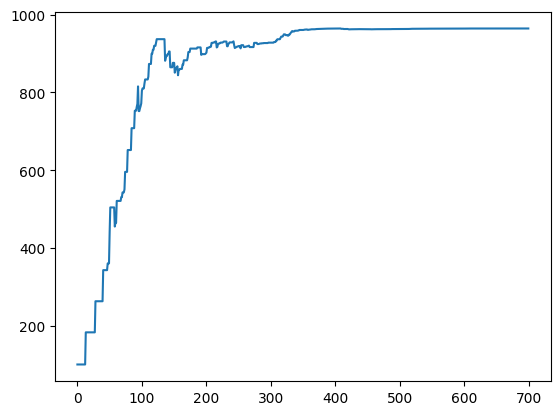

In [168]:
# training

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score: ', str(score))

print('Trained Q Matrix: ')
print(Q/np.max(Q)*100)

# testing

current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print('Most Efficient Path: ')
print(steps)

plb.plot(scores)
plb.show()